In [1]:
!nvidia-smi

Tue Dec 24 11:19:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [11]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2NZQR75z2sO7kbJjgbId")
project = rf.workspace("smoke-hlikv").project("deteksi-asap-bluyp")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteksi-Asap-1 in yolov8:: 100%|██████████| 10172/10172 [00:01<00:00, 5308.36it/s]


In [26]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Deteksi-Asap-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

/content


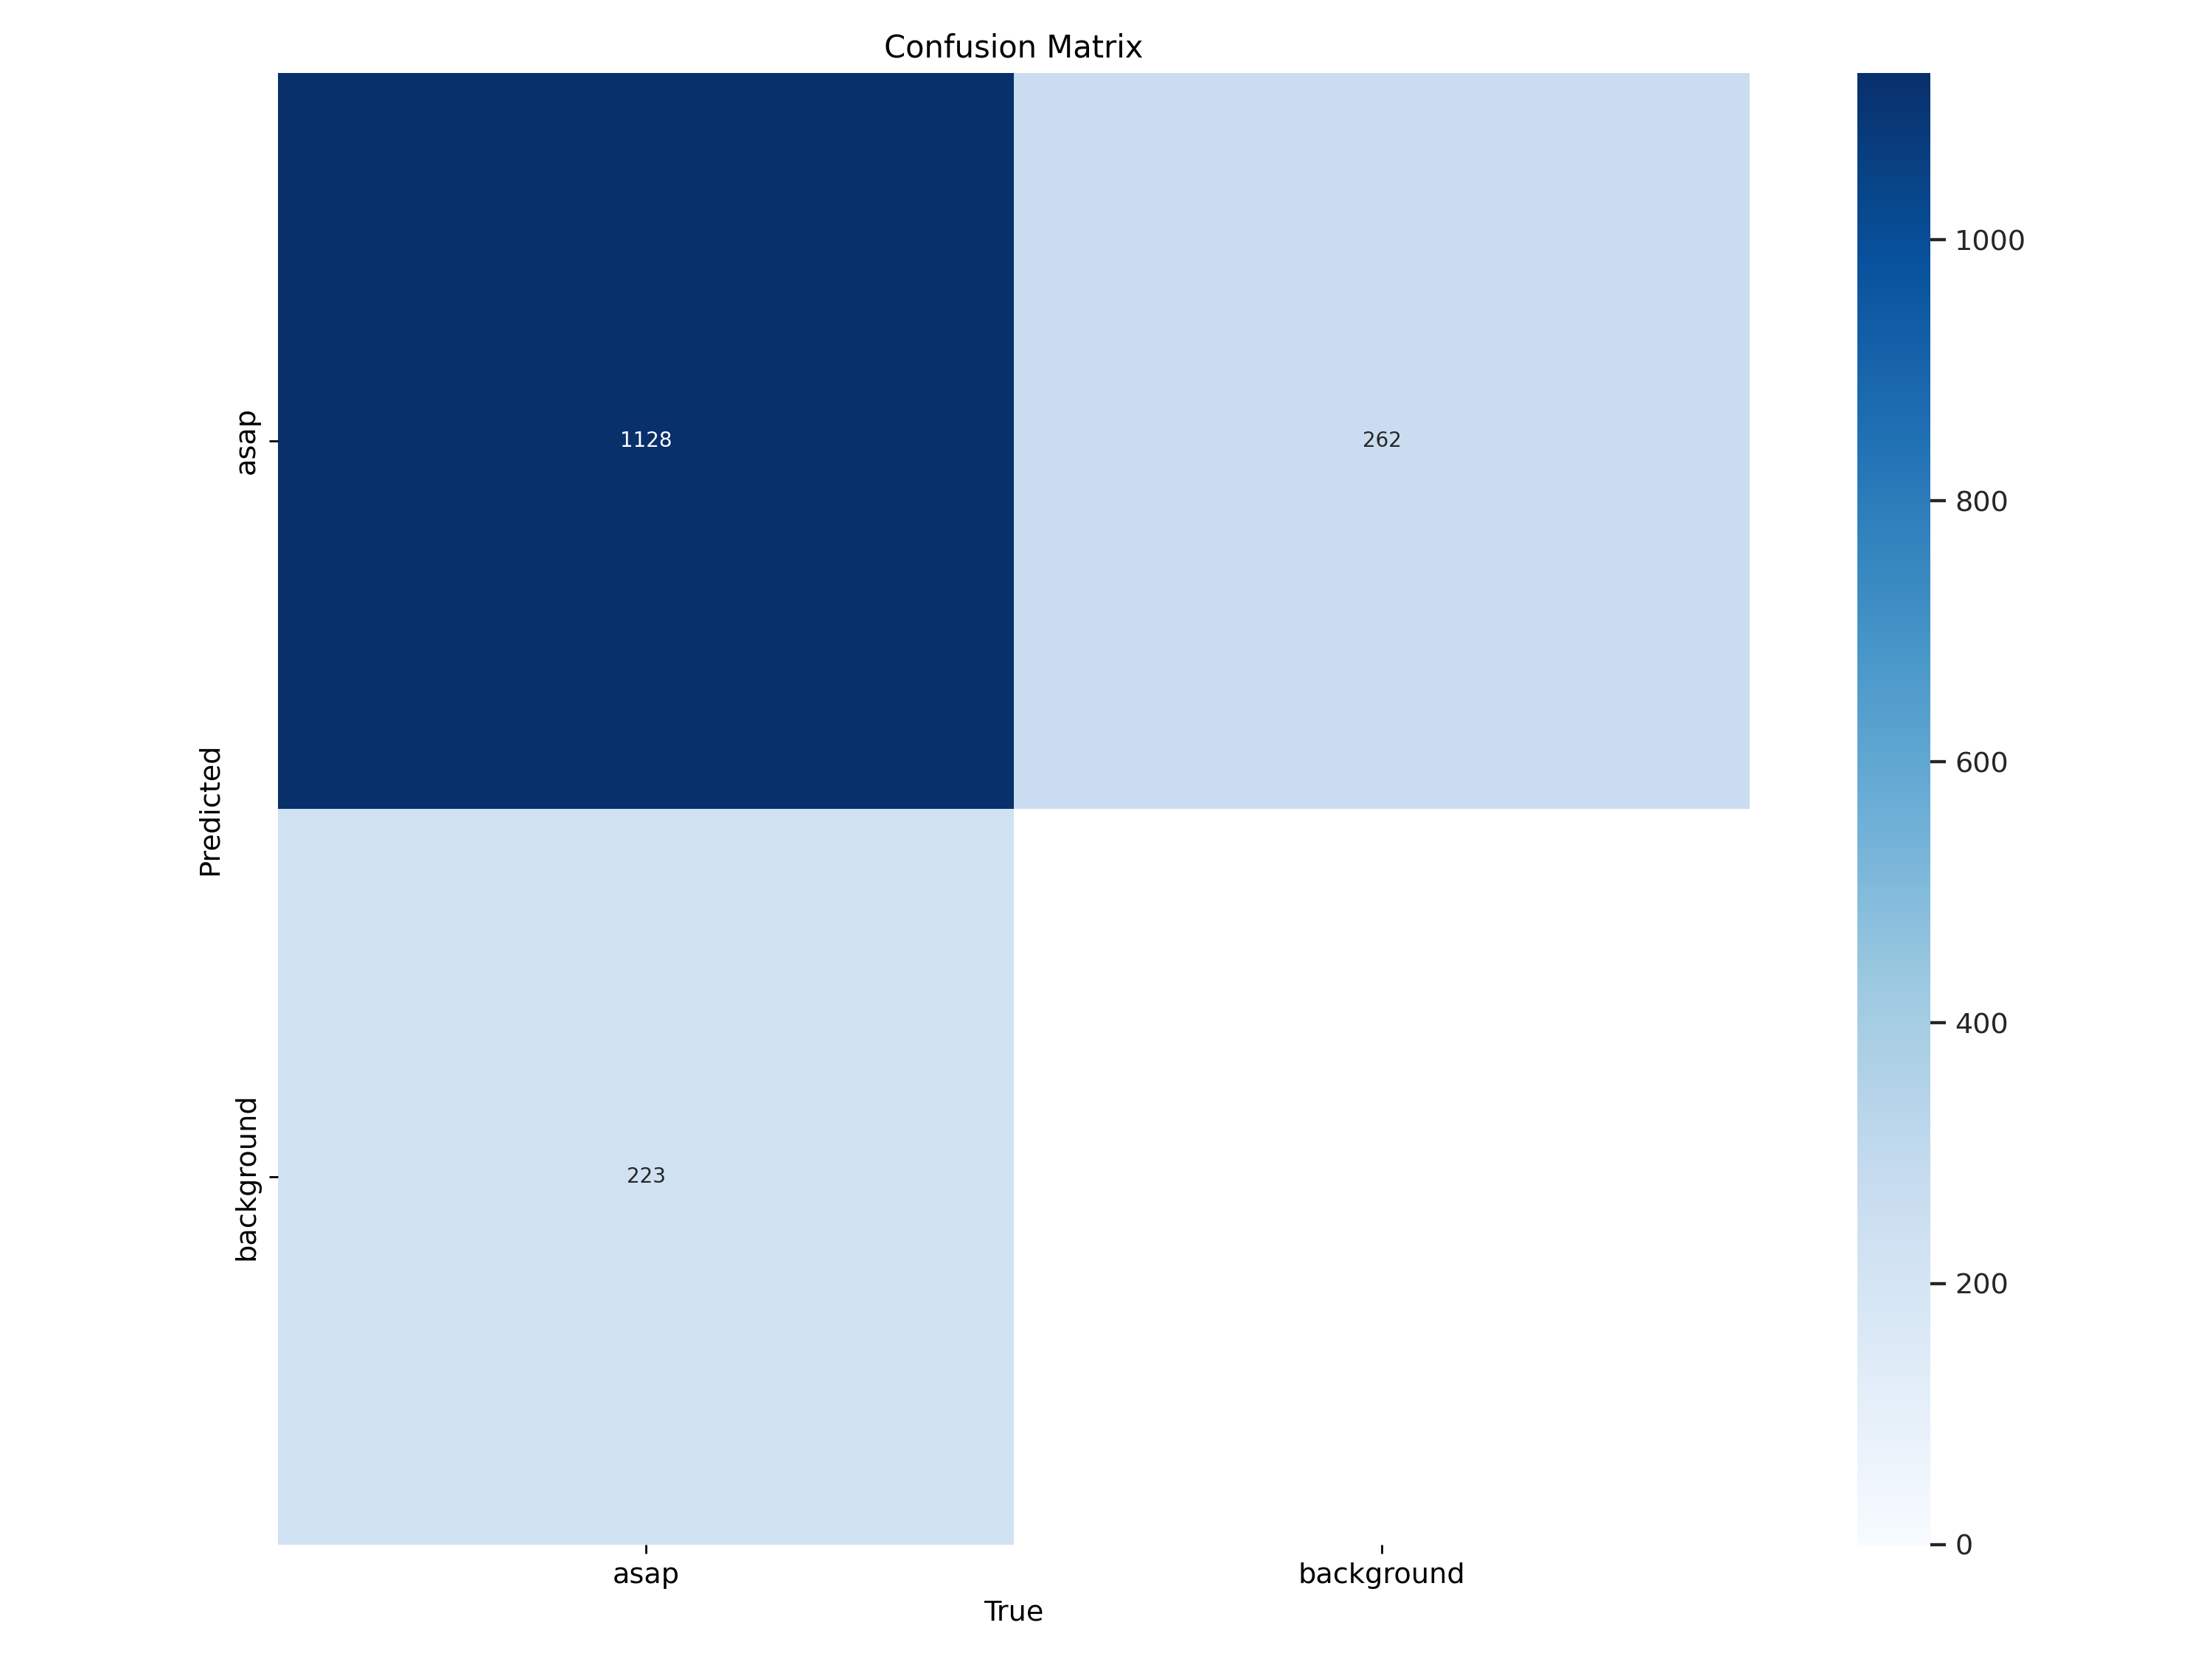

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


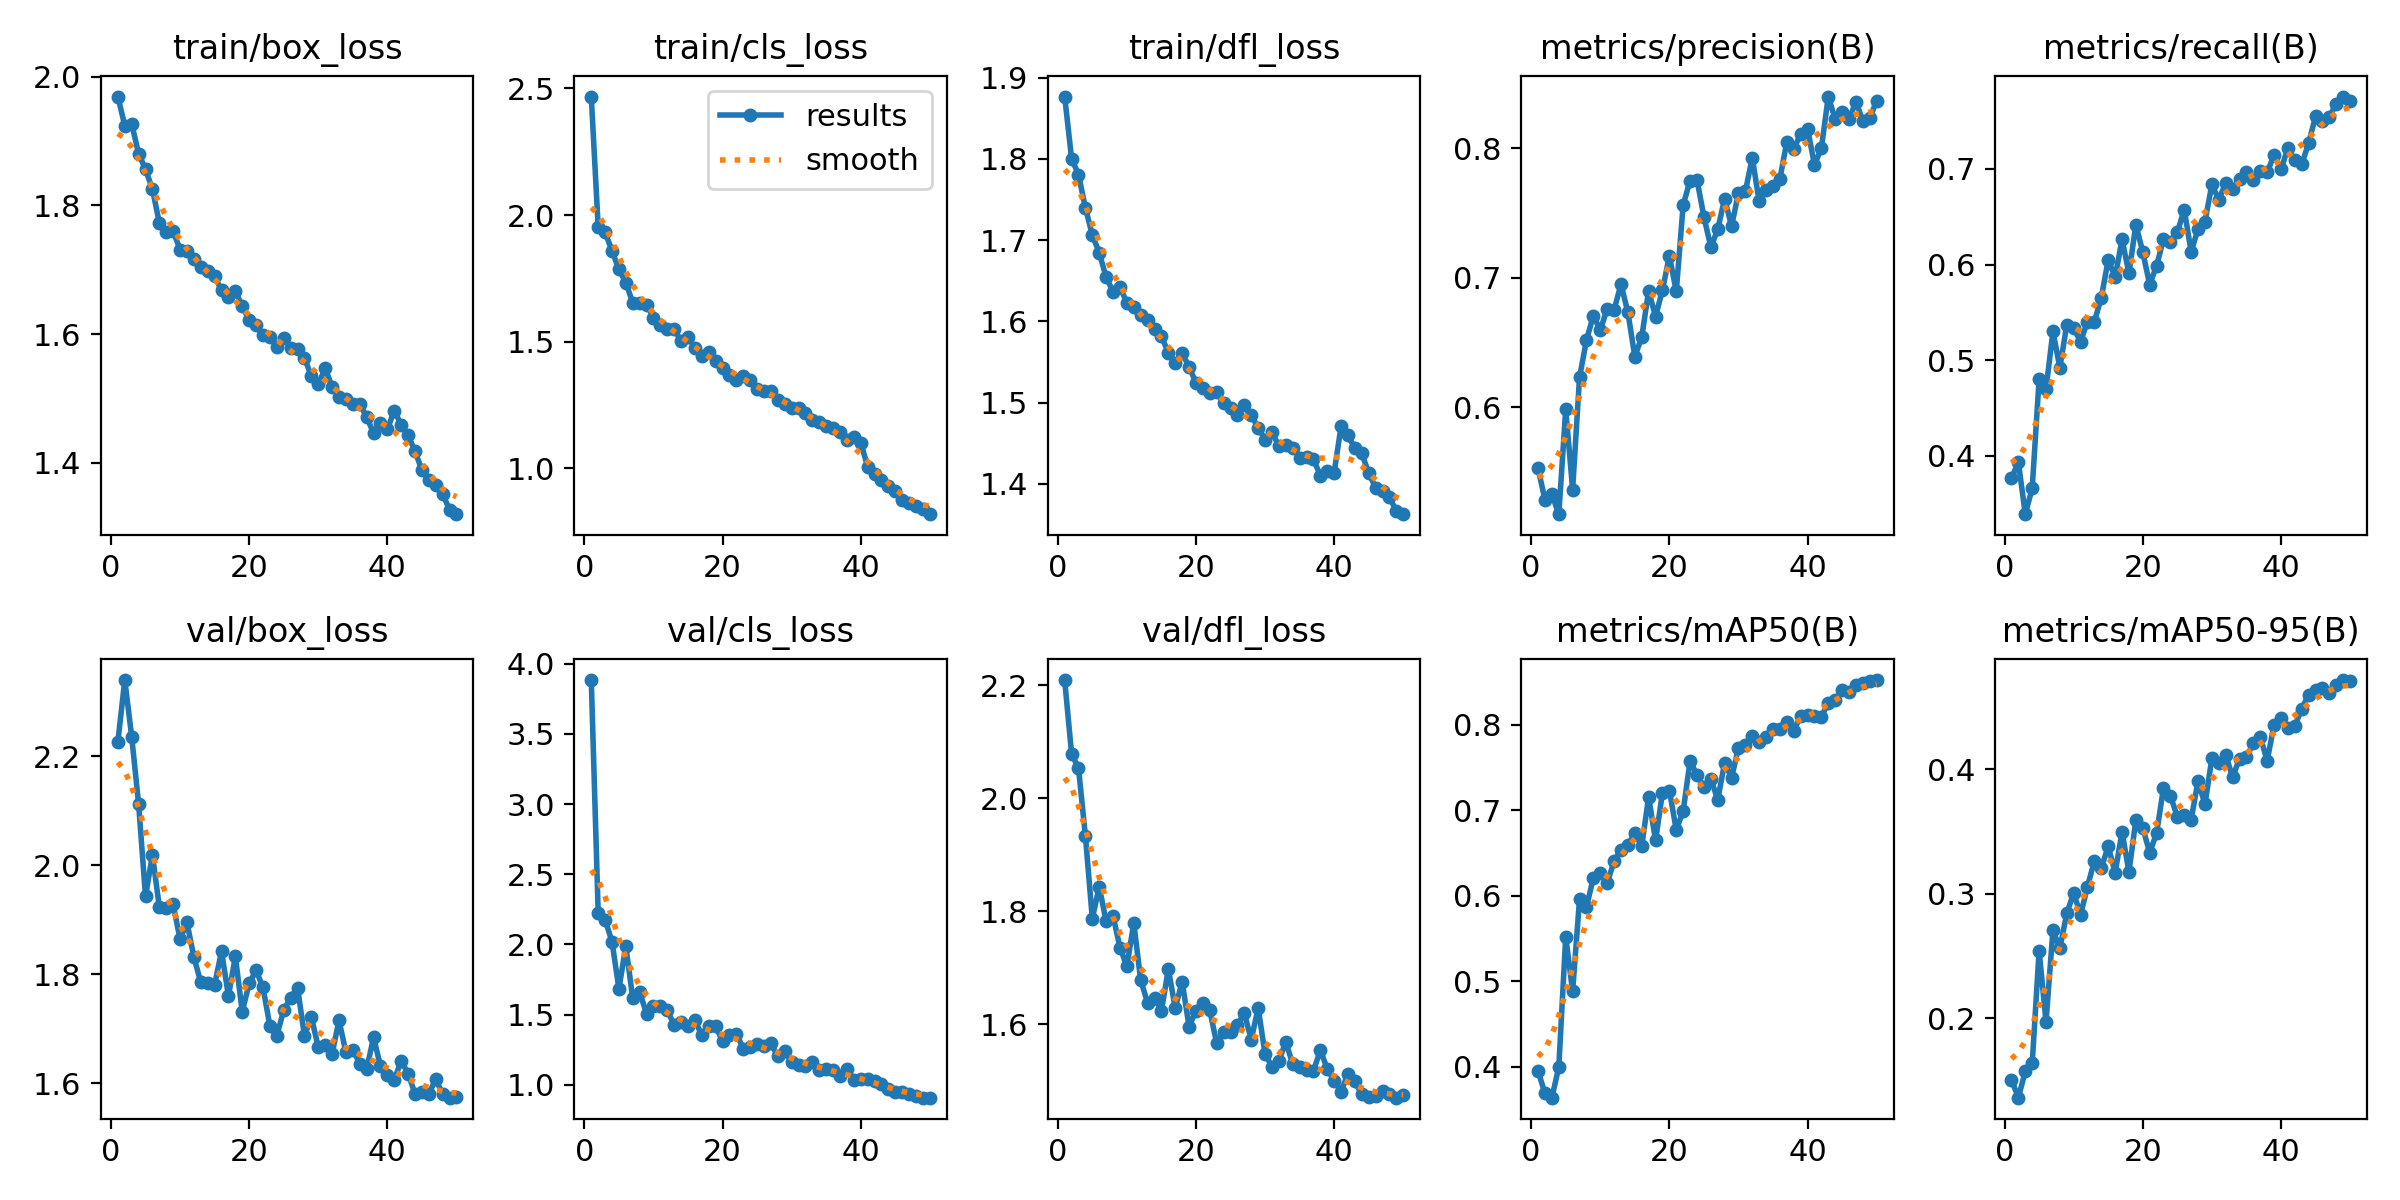

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


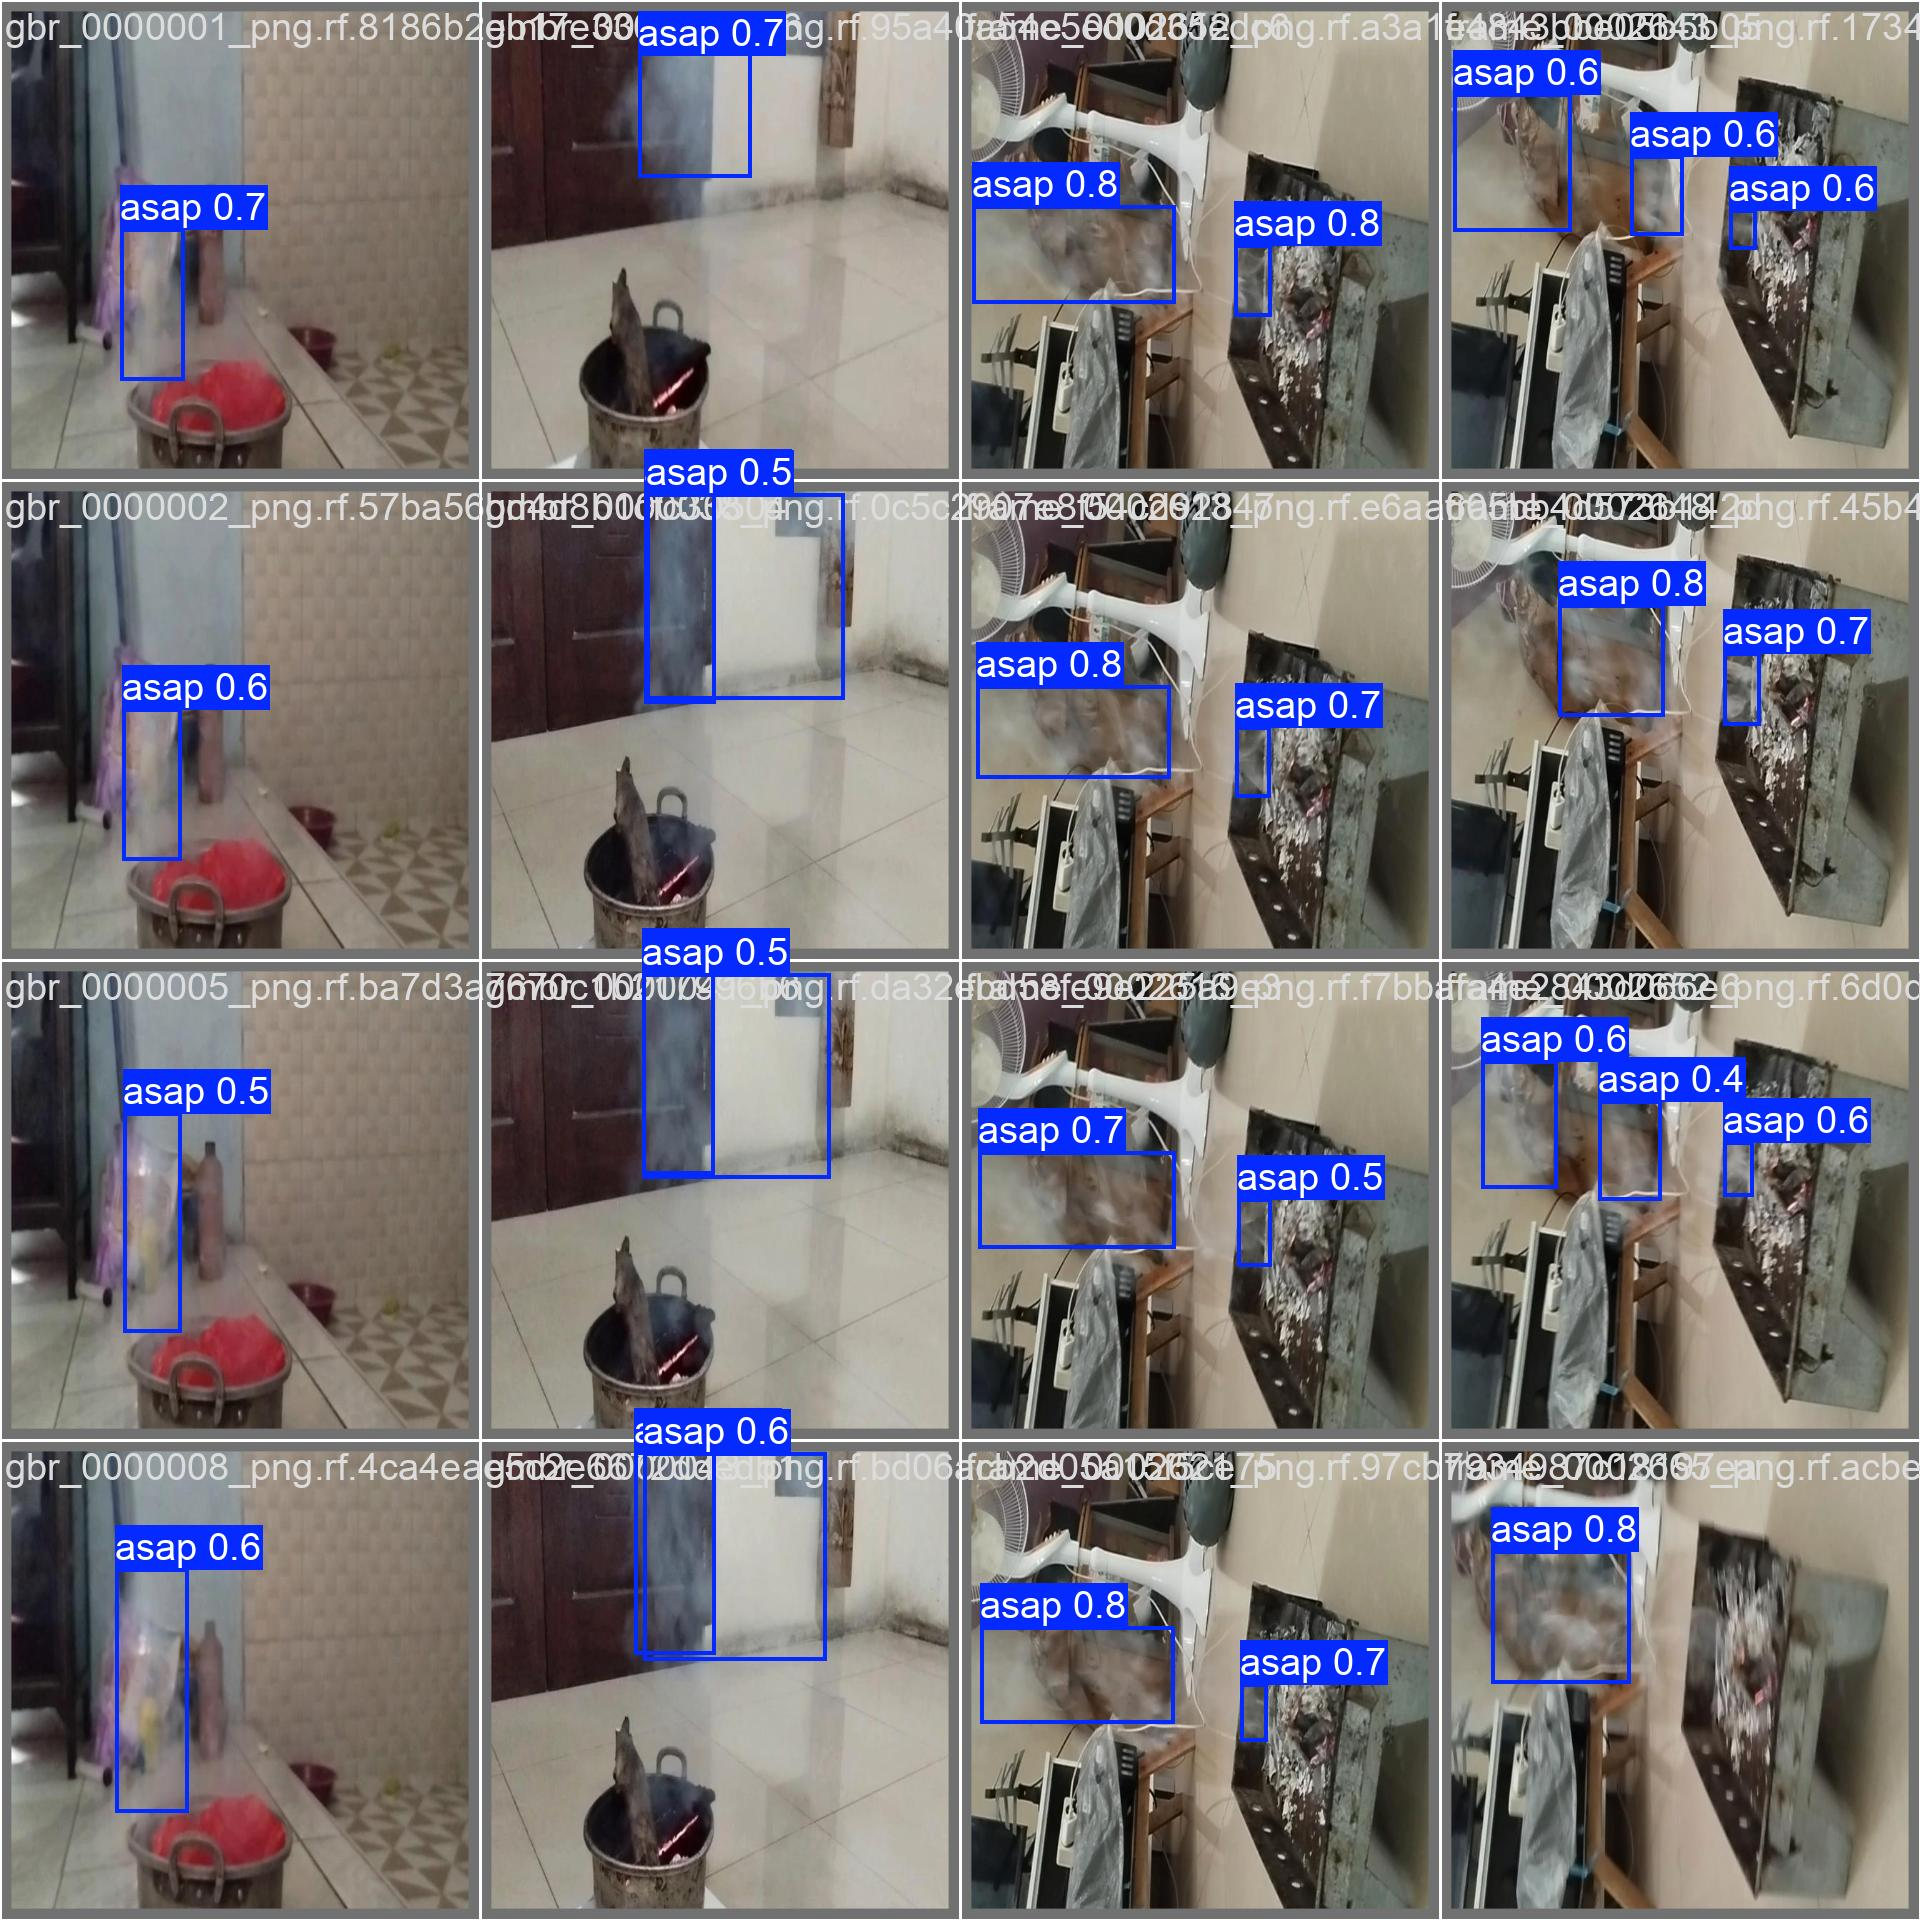

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

/content


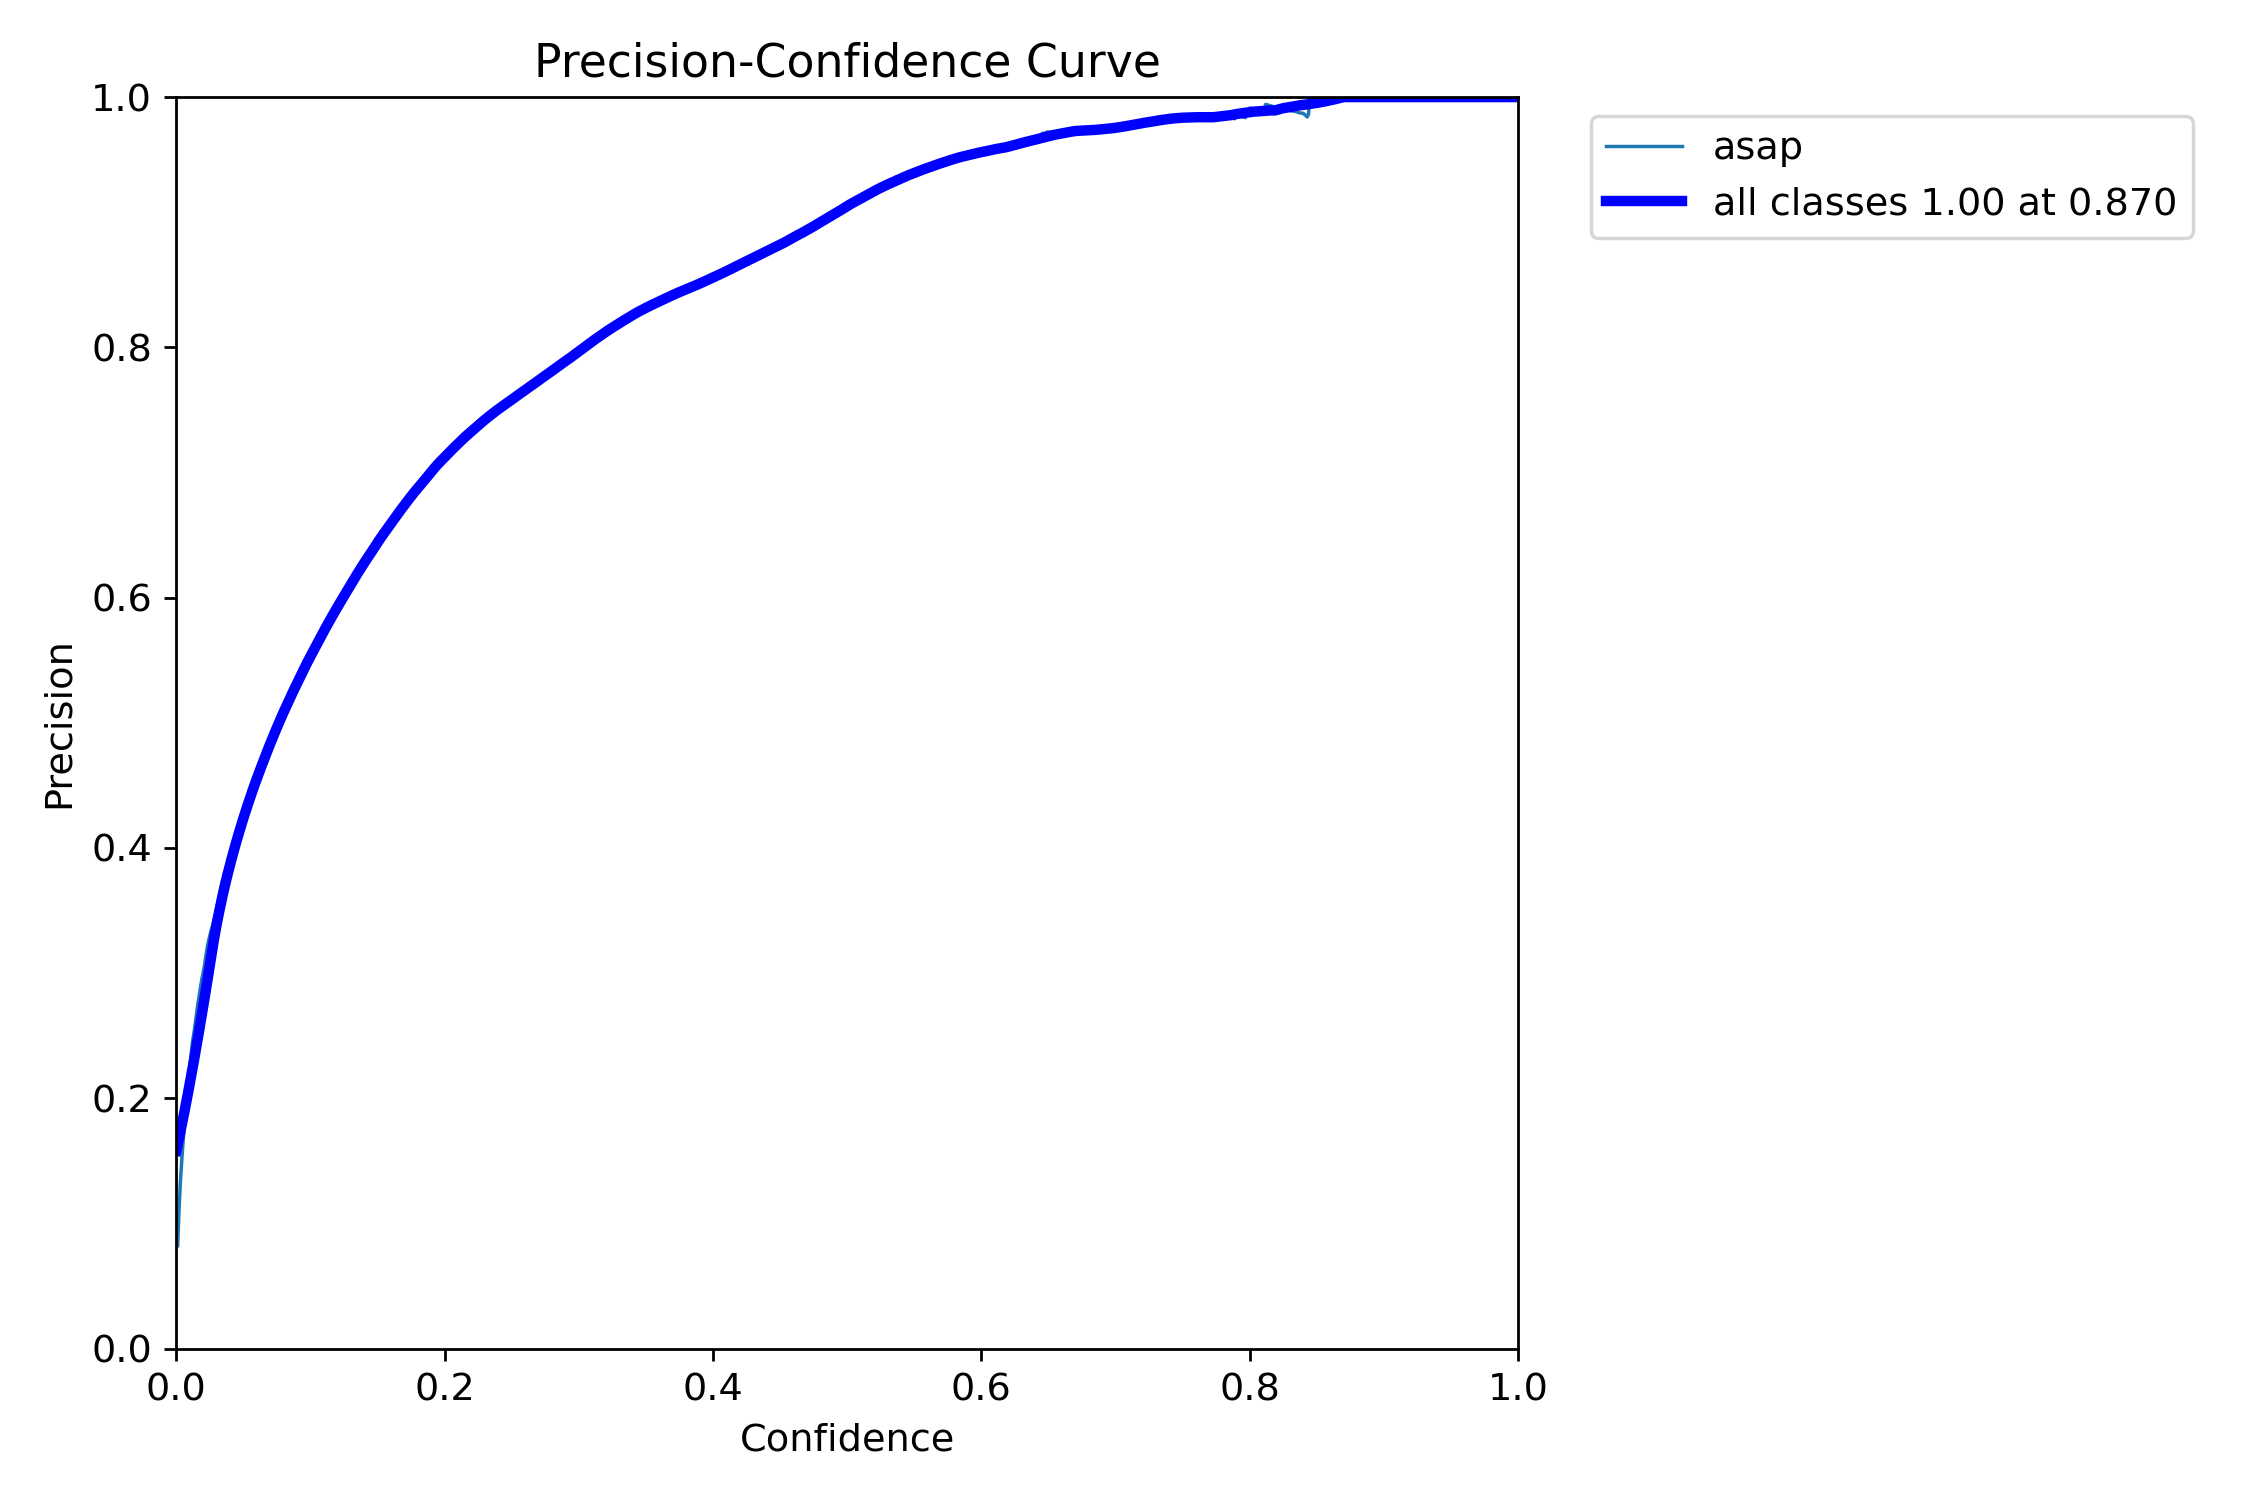

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/P_curve.png', width=600)

/content


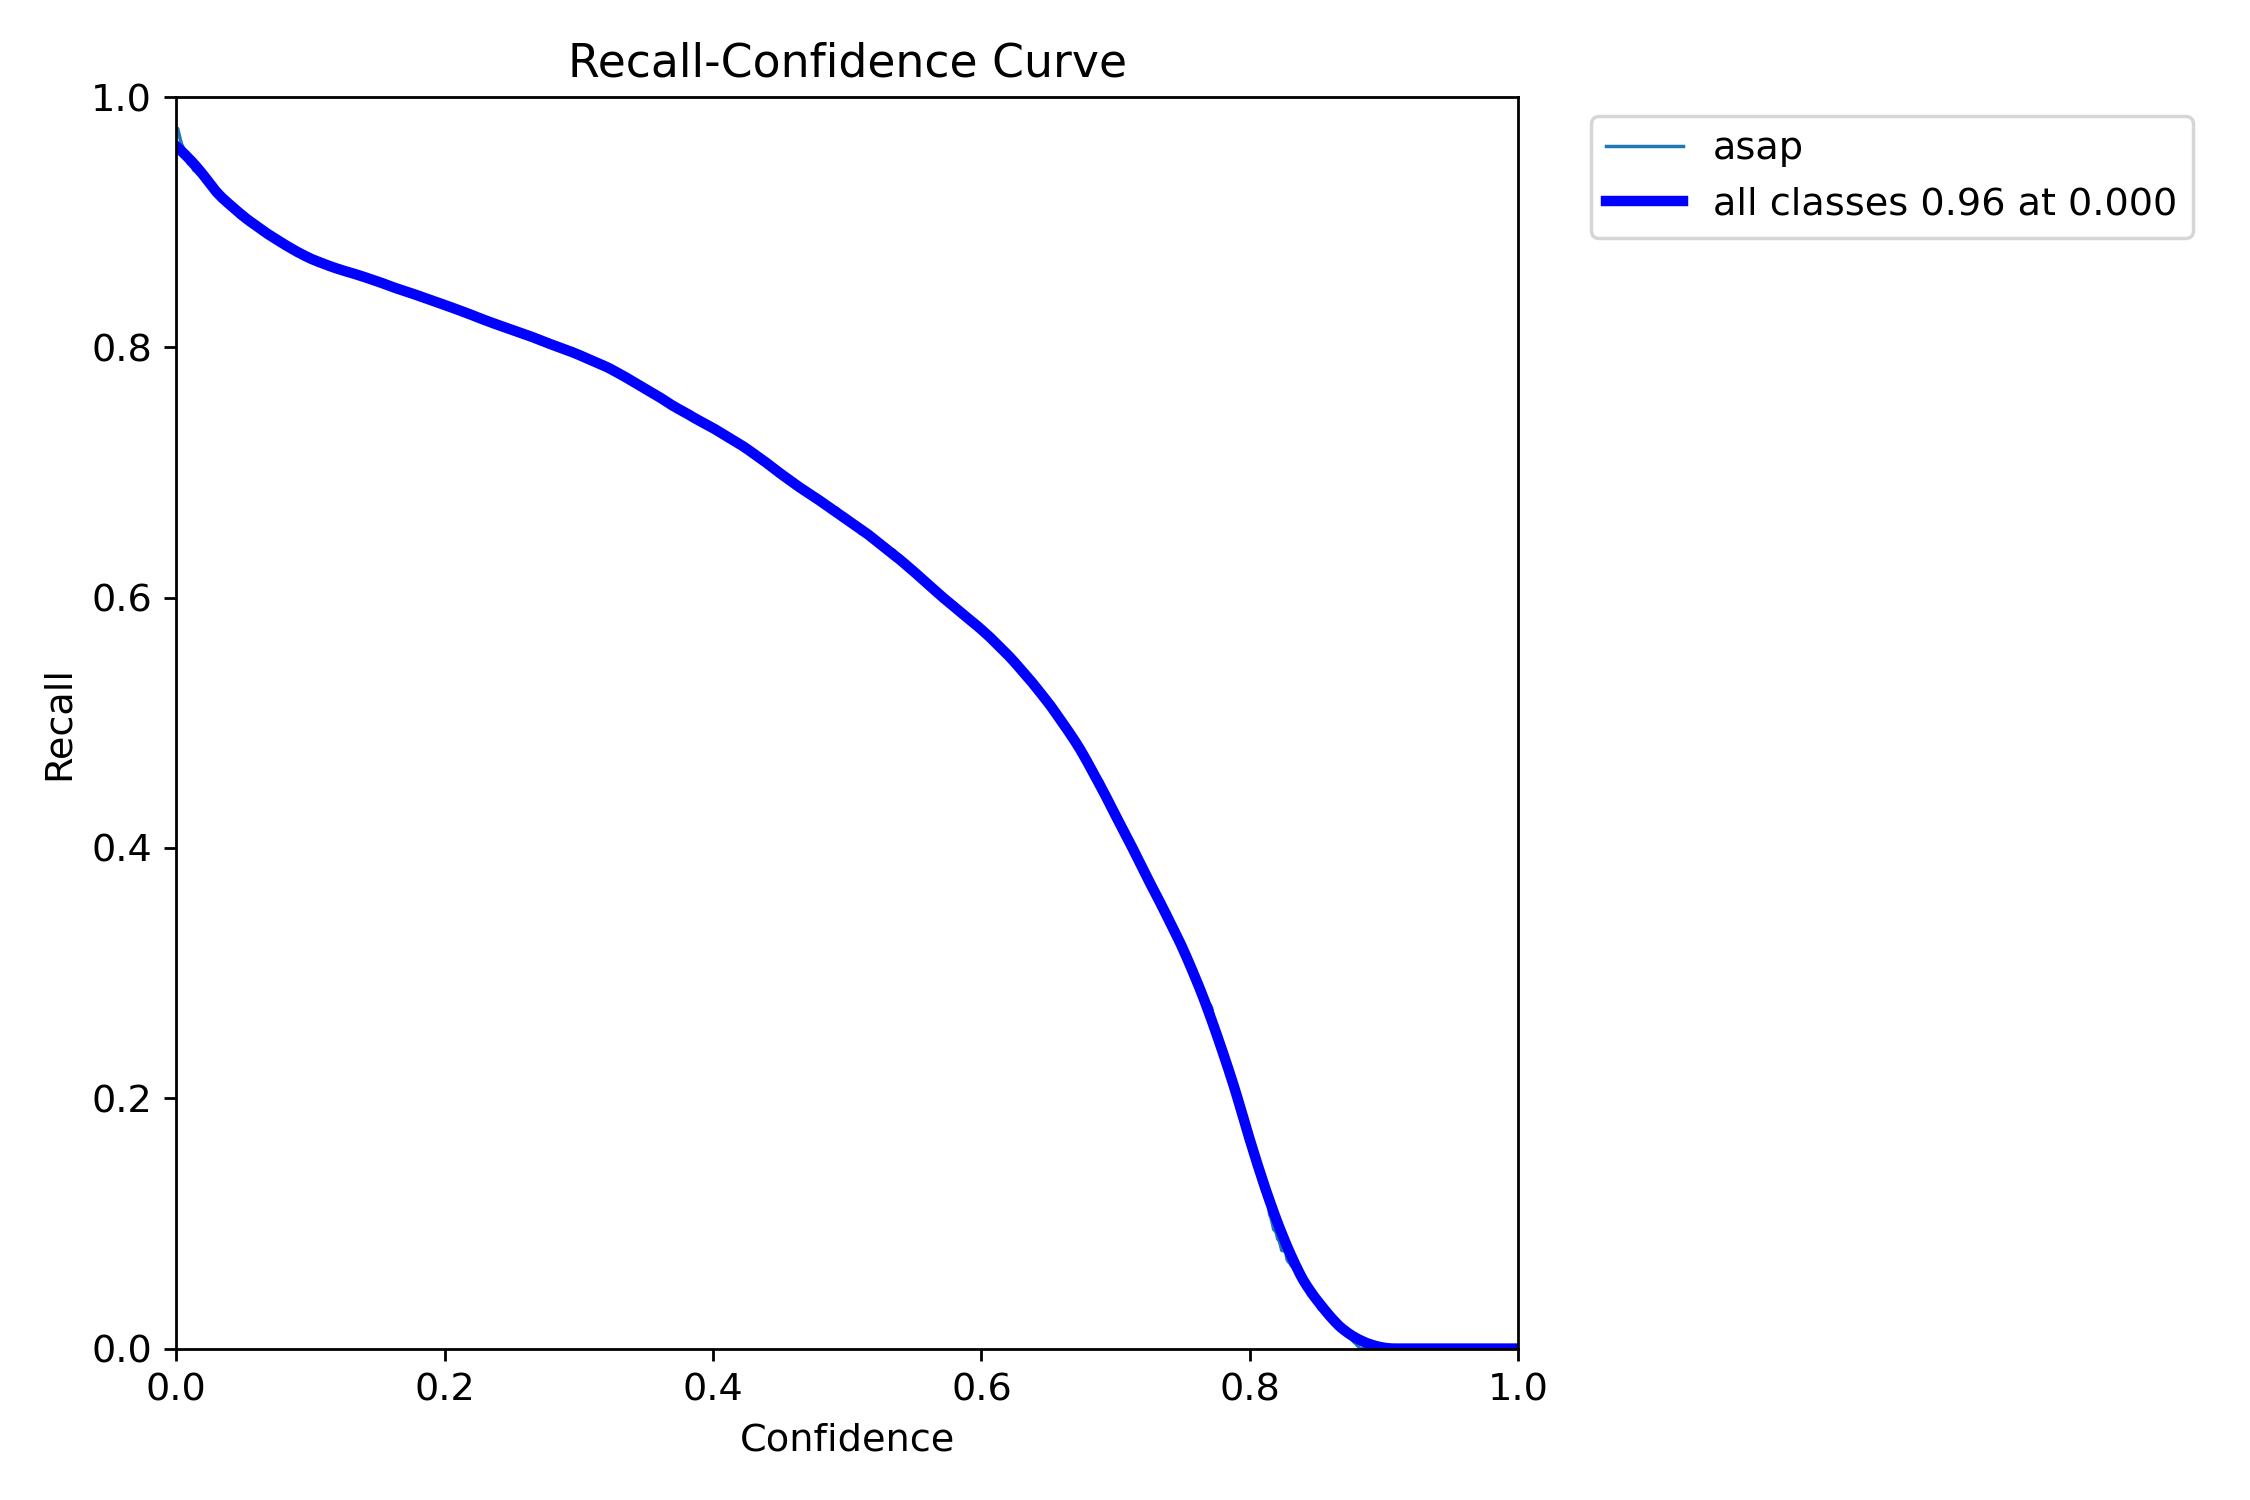

In [33]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/R_curve.png', width=600)

/content


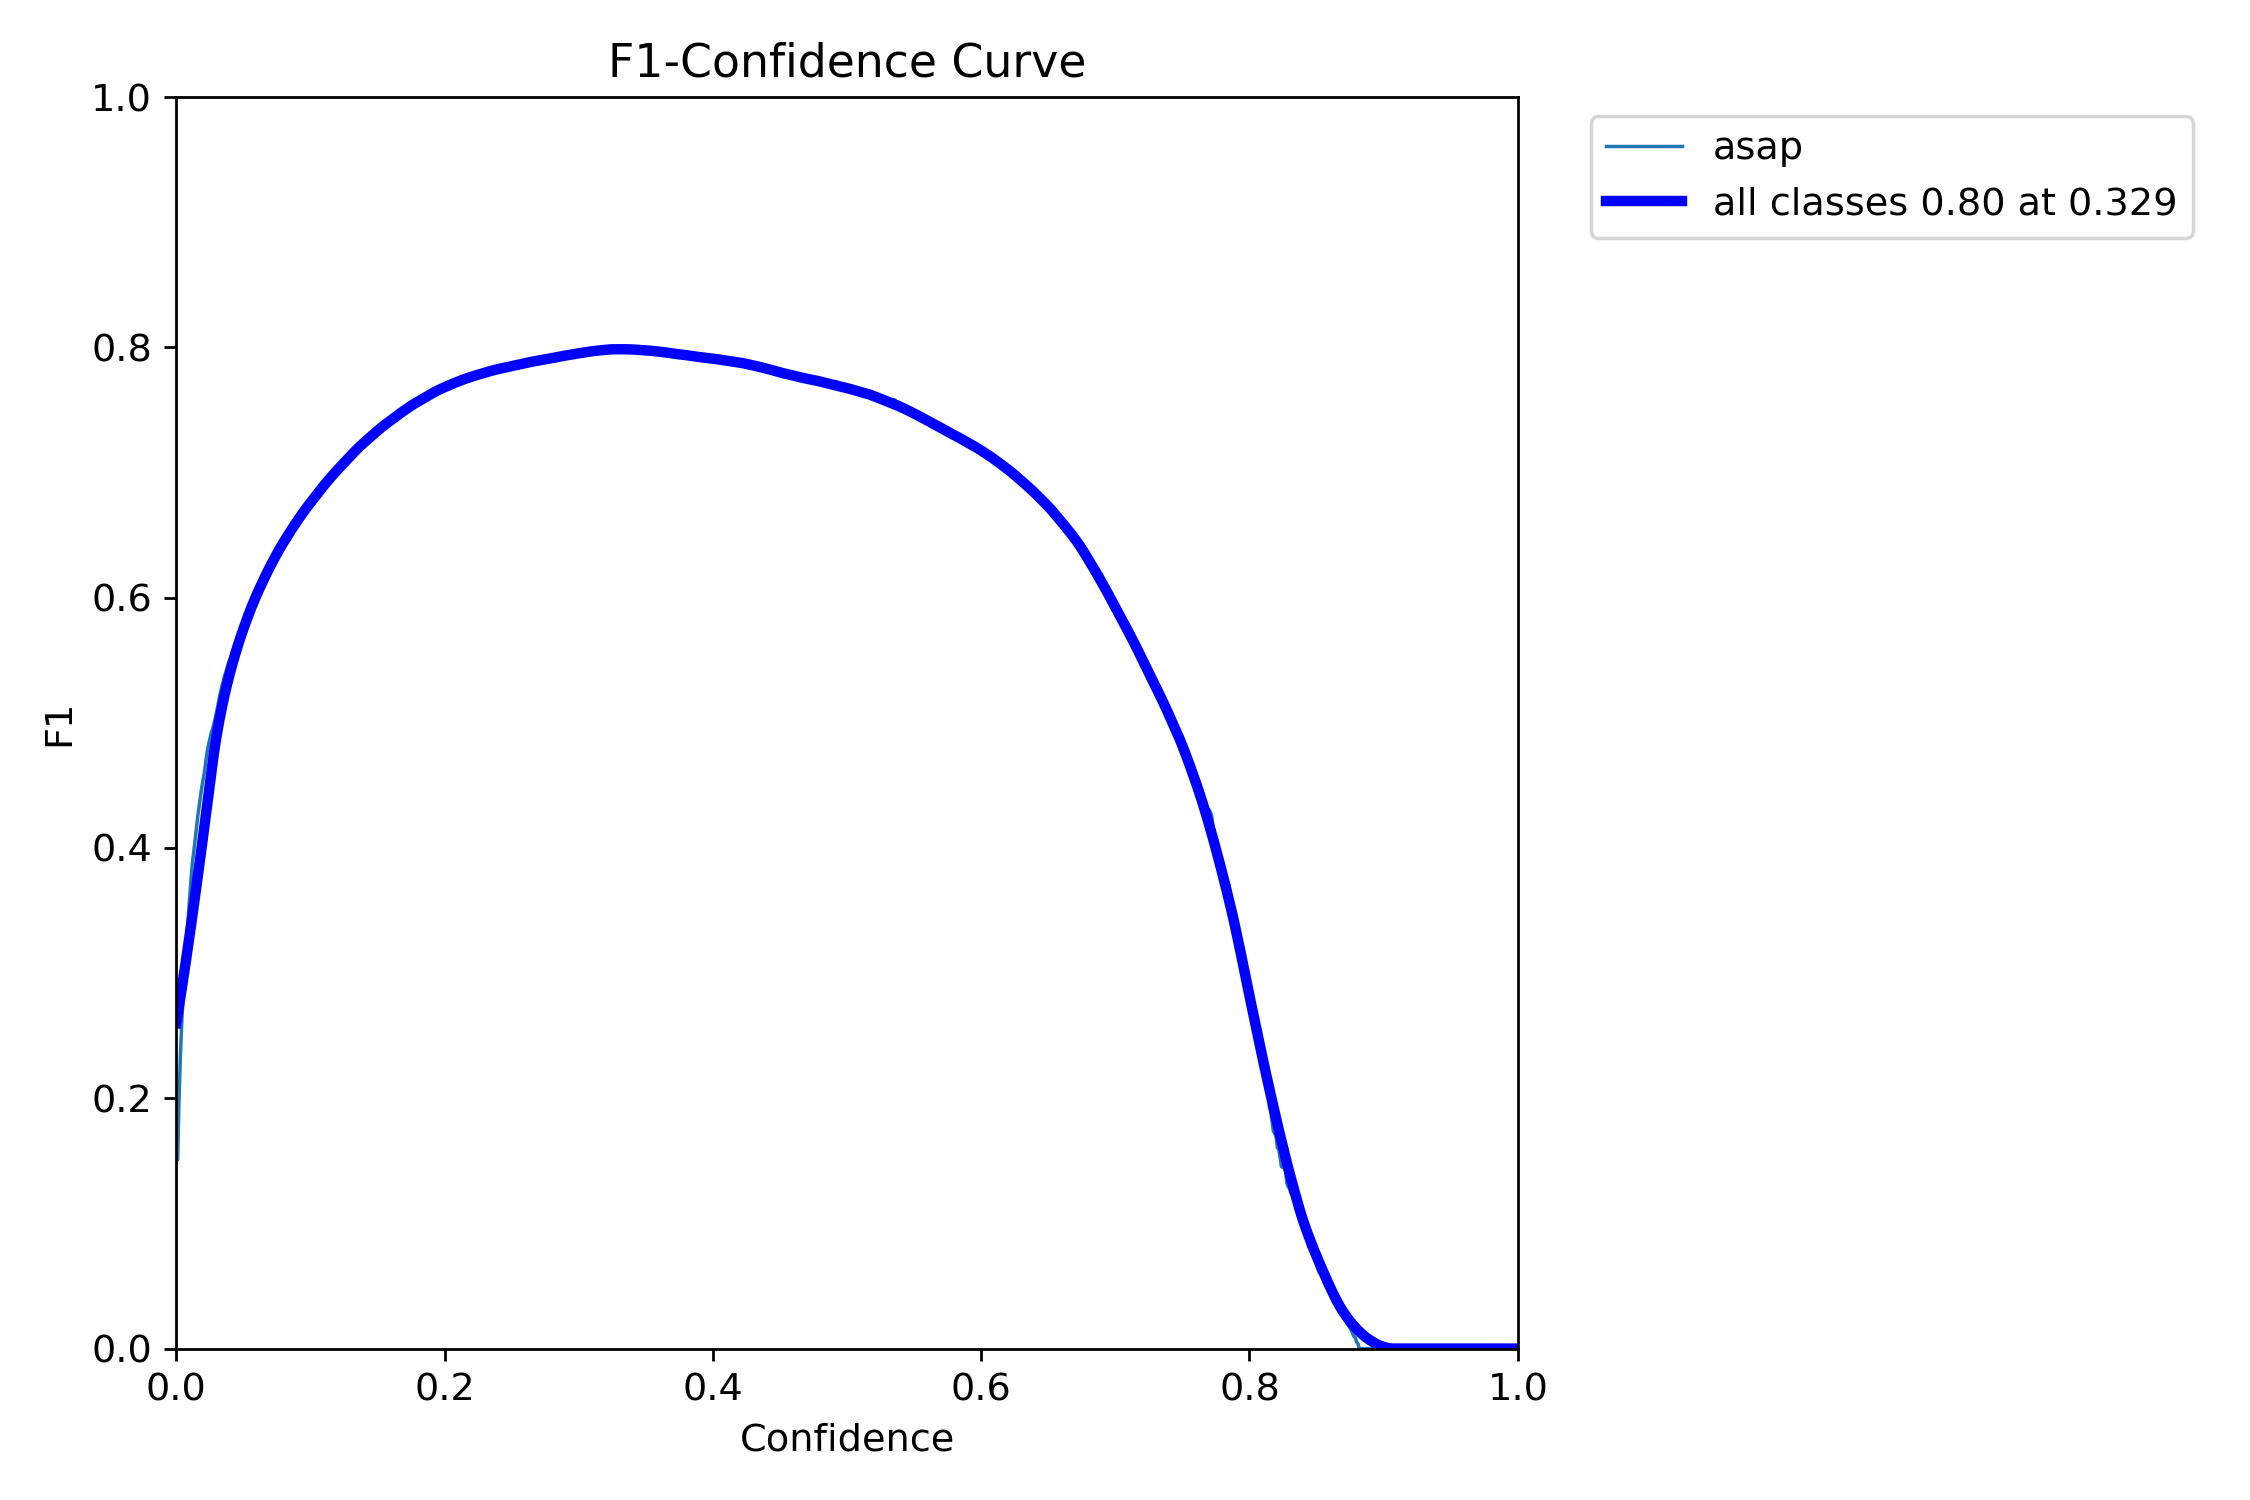

In [34]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/F1_curve.png', width=600)

## Validate Custom Model

In [35]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Deteksi-Asap-1/valid/labels.cache... 1016 images, 0 backgrounds, 0 corrupt: 100% 1016/1016 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 64/64 [00:14<00:00,  4.28it/s]
                   all       1016       1351      0.823      0.774      0.848      0.471
Speed: 0.5ms preprocess, 8.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [36]:
# Hasil dari validasi
precision = 0.823
recall = 0.774
instances = 1351

# Menghitung TP, FP, FN
tp = recall * instances
fp = tp * (1 / precision - 1)
fn = instances - tp

# Menghitung Akurasi
accuracy = tp / (tp + fp + fn)


# Menghitung F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil
print(f"Precision (P): {precision:.3f}")
print(f"Recall (R): {recall:.3f}")
print(f"Akurasi: {accuracy:.3f}")
print(f"F1-Score: {f1_score:.3f}")


Precision (P): 0.823
Recall (R): 0.774
Akurasi: 0.664
F1-Score: 0.798
